In [1]:
ELECTRONICOS

NameError: name 'ELECTRONICOS' is not defined

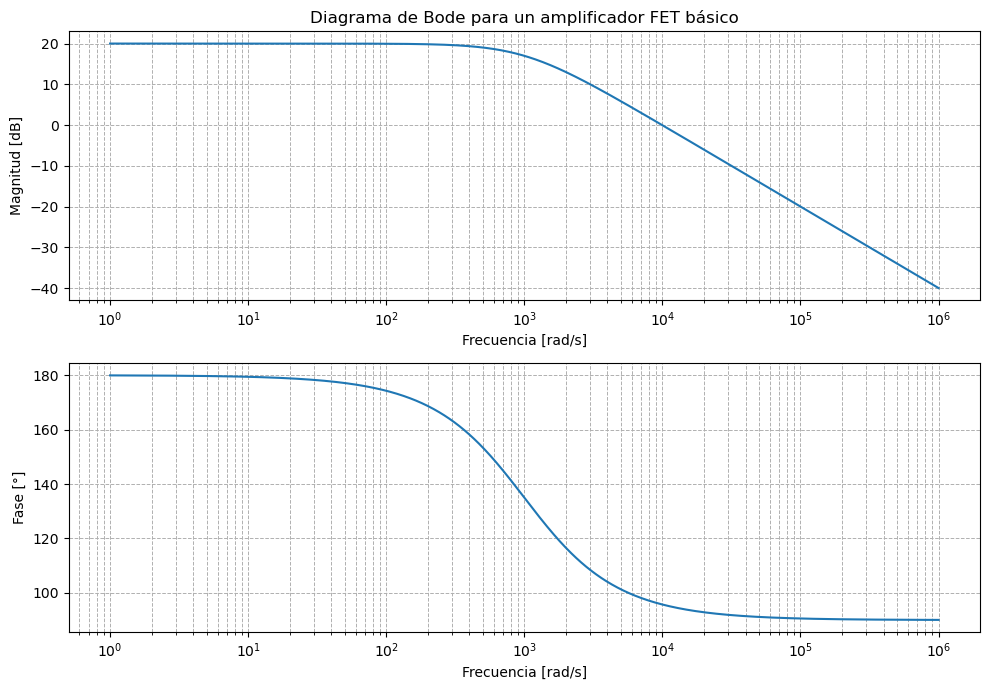

In [2]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Definimos los componentes del circuito
R_D = 1000  # Resistencia en el drenaje (Ohmios)
R_S = 100   # Resistencia en la fuente (Ohmios)
C_D = 1e-6  # Condensador en la salida (Faradios)

# Ganancia del amplificador en baja frecuencia
A_v = -R_D / R_S

# Función de transferencia (H(s) = A_v / (1 + s/(R_D * C_D)))
num = [A_v]                 # Numerador: ganancia constante
den = [R_D * C_D, 1]        # Denominador: 1 + s/(R_D * C_D)

# Crear el sistema de transferencia usando scipy
system = signal.TransferFunction(num, den)

# Frecuencias para evaluar el diagrama de Bode (de 1 Hz a 1 MHz)
frequencies = np.logspace(0, 6, 1000)  # 1 a 10^6 Hz

# Obtener la respuesta de Bode
w, mag, phase = signal.bode(system, frequencies)

# Graficar la magnitud en dB
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # Escala logarítmica para la frecuencia
plt.title('Diagrama de Bode para un amplificador FET básico')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.grid(which='both', linestyle='--', linewidth=0.7)

# Graficar la fase en grados
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # Escala logarítmica para la frecuencia
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Fase [°]')
plt.grid(which='both', linestyle='--', linewidth=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


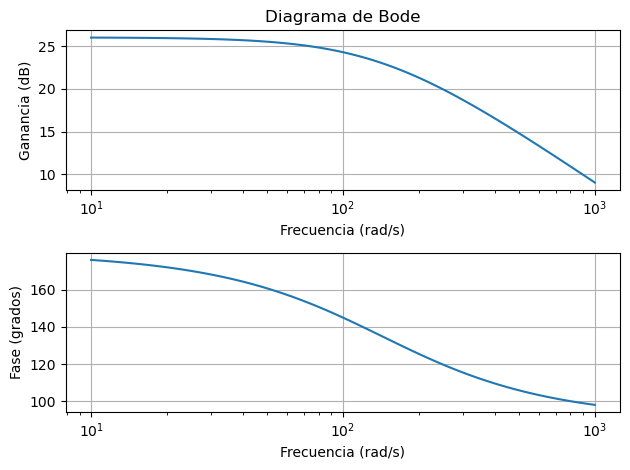

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Parámetros del circuito
R1 = 1e6
R2 = 385
Rd = 2000
Rs = 70
C1 = 10e-6
C2 = 100e-6

# Frecuencia de corte
fc = 1 / (2 * np.pi * Rs * C2)

# Definición del sistema de transferencia
Av = -20
num = [Av]
den = [Rs * C2, 1]

sistema = signal.TransferFunction(num, den)
w, mag, phase = signal.bode(sistema)

# Graficar
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title("Diagrama de Bode")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Ganancia (dB)")
plt.grid()

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (grados)")
plt.grid()
plt.tight_layout()
plt.show()


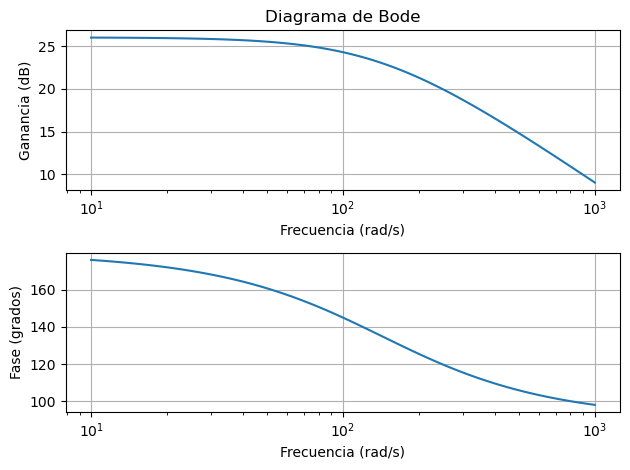

In [2]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Parámetros del amplificador (modifica según tu circuito)
R1 = 1e6  # Resistencia en ohmios (1M Ohm)
R2 = 385  # Resistencia en ohmios
Rd = 2000  # Resistencia de drenaje en ohmios (2k Ohm)
Rs = 70  # Resistencia en la fuente en ohmios
C1 = 10e-6  # Condensador de acoplamiento (10 µF)
C2 = 100e-6  # Condensador de bypass (100 µF)

# Calculo de frecuencia de corte (modifica según tu configuración)
fc = 1 / (2 * np.pi * Rs * C2)  # Frecuencia de corte (baja frecuencia)

# Definición de la función de transferencia H(s) = Av / (1 + s/w)
Av = -20  # Ganancia en dB
num = [Av]
den = [Rs * C2, 1]

# Crear el sistema de la función de transferencia
sistema = signal.TransferFunction(num, den)

# Obtener la respuesta en frecuencia del sistema
w, mag, phase = signal.bode(sistema)

# Graficar la magnitud (ganancia)
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # Eje X en escala logarítmica
plt.title("Diagrama de Bode")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Ganancia (dB)")
plt.grid()

# Graficar la fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # Eje X en escala logarítmica
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (grados)")
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


C:\Users\seanz\AppData\Local\Temp\ipykernel_17388\2557625318.py:8: RuntimeWarning: invalid value encountered in divide
  hd = 0.25 * np.sin(0.25 * np.pi * (n - 18)) / (0.25 * np.pi * (n - 18))


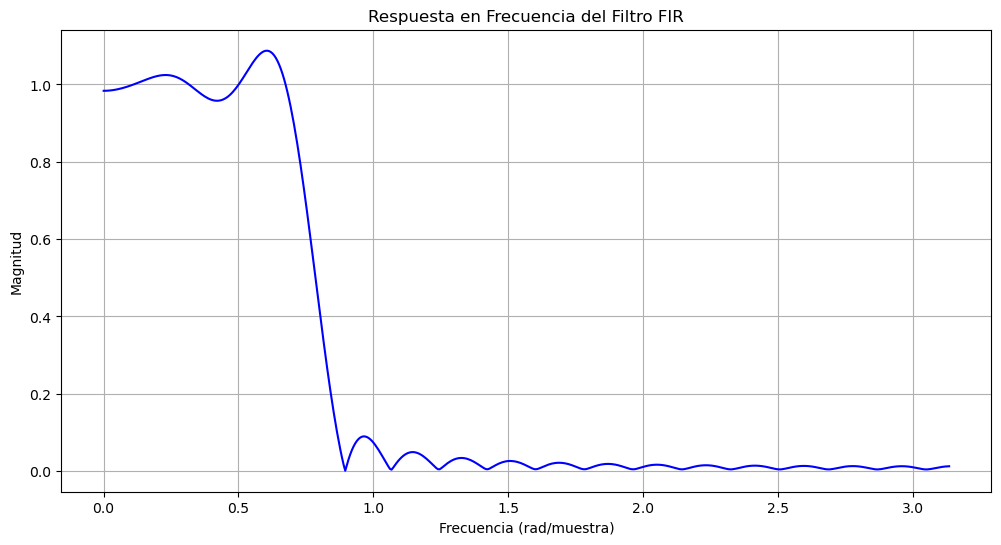

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Definir los parámetros
n = np.arange(0, 34)  # Equivalente a n = 0:33 en MATLAB
# Definir la función del filtro FIR hd, usando la fórmula proporcionada
hd = 0.25 * np.sin(0.25 * np.pi * (n - 18)) / (0.25 * np.pi * (n - 18))

# Manejar la división por cero en el índice central (n = 18)
hd[18] = 0.25

# Calcular la respuesta en frecuencia del filtro FIR
w, h = freqz(hd)

# Graficar la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w, abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


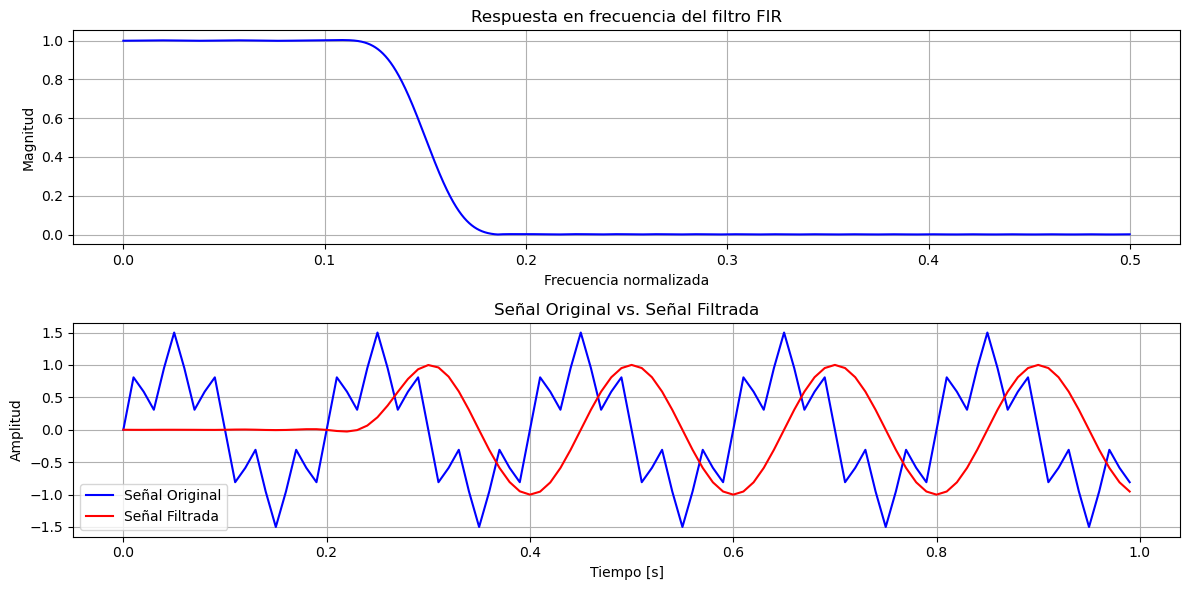

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Definir los parámetros del filtro FIR
num_taps = 51  # Número de coeficientes del filtro (orden + 1)
cutoff_freq = 0.3  # Frecuencia de corte normalizada (0.3 * frecuencia de Nyquist)

# Diseñar el filtro FIR paso bajo usando la técnica de la ventana de Hamming
fir_coeff = firwin(num_taps, cutoff=cutoff_freq, window="hamming")

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro FIR
plt.figure(figsize=(12, 6))

# Respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * w / np.pi, np.abs(h), 'b')
plt.title('Respuesta en frecuencia del filtro FIR')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud')
plt.grid()

# Crear una señal de prueba: suma de dos sinusoides con diferentes frecuencias
fs = 100  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1.0, 1.0/fs)  # Vector de tiempo
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 25 * t)

# Filtrar la señal de prueba usando el filtro FIR diseñado
y = lfilter(fir_coeff, 1.0, x)

# Graficar la señal original y la señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, x, 'b-', label='Señal Original')
plt.plot(t, y, 'r-', label='Señal Filtrada')
plt.title('Señal Original vs. Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Orden del filtro: 33
 
Coeficientes del filtro
 
 [-0.00124887 -0.00056057  0.0007664   0.00291968  0.00527456  0.0061186
  0.00326933 -0.00446935 -0.01570059 -0.02570283 -0.02736091 -0.01377411
  0.01839251  0.06635127  0.12084185  0.16851983  0.19636319  0.19636319
  0.16851983  0.12084185  0.06635127  0.01839251 -0.01377411 -0.02736091
 -0.02570283 -0.01570059 -0.00446935  0.00326933  0.0061186   0.00527456
  0.00291968  0.0007664  -0.00056057 -0.00124887] 


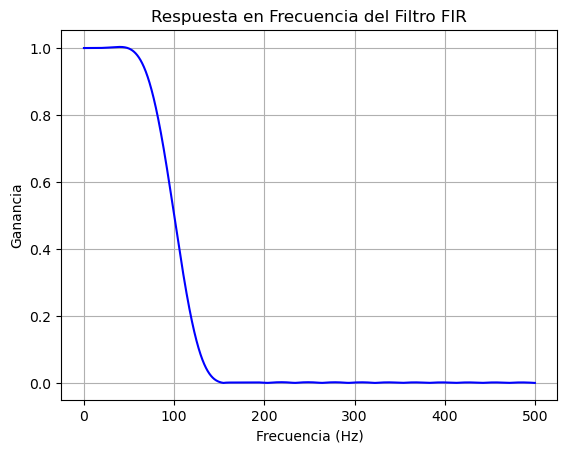

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parámetros del filtro
Fc = 200  # Frecuencia de corte (Hz)
fs = 1000  # Frecuencia de muestreo (Hz)
delta_f = 100  # Banda de transición (Hz)

# Paso 1: Calcular el orden del filtro
N = int(np.ceil(3.3 * fs / delta_f))

# Paso 2: Frecuencia de corte normalizada
fc_norm = Fc / fs

# Paso 3: Calcular los coeficientes del filtro usando una ventana Hamming
coeffs = signal.firwin(N + 1, fc_norm, window='hamming', pass_zero='lowpass')

# Mostrar el orden y los coeficientes
print(f"Orden del filtro: {N}")
print(" ")
print(f"Coeficientes del filtro")
print(" ")
print(f" {coeffs} " )

# Paso 4: Graficar la respuesta en frecuencia
w, h = signal.freqz(coeffs, worN=8000)
plt.plot((w / np.pi) * (fs / 2), np.abs(h), 'b')
plt.title("Respuesta en Frecuencia del Filtro FIR")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()


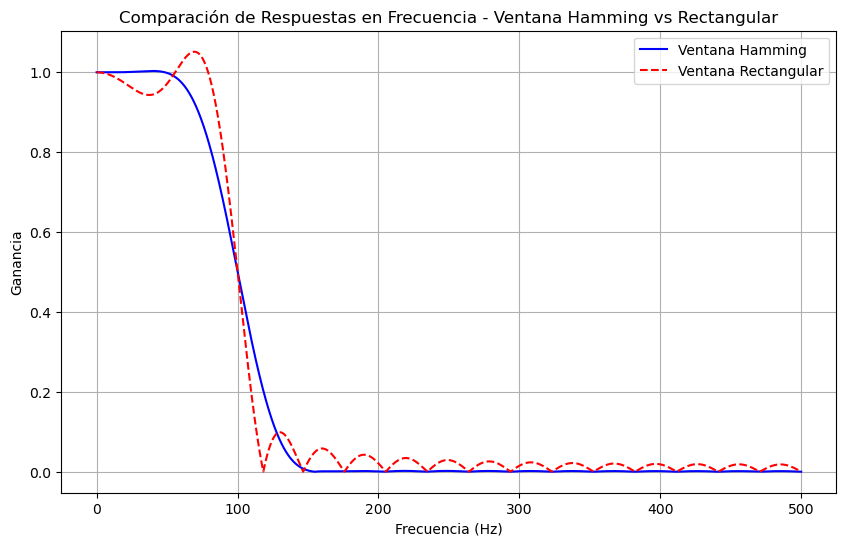

In [15]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parámetros del filtro
Fc = 200  # Frecuencia de corte (Hz)
fs = 1000  # Frecuencia de muestreo (Hz)
delta_f = 100  # Banda de transición (Hz)

# Paso 1: Calcular el orden del filtro
N = int(np.ceil(3.3 * fs / delta_f))

# Paso 2: Frecuencia de corte normalizada
fc_norm = Fc / fs

# Paso 3: Calcular los coeficientes del filtro usando ventana Hamming y ventana Rectangular
coeffs_hamming = signal.firwin(N + 1, fc_norm, window='hamming', pass_zero='lowpass')
coeffs_rectangular = signal.firwin(N + 1, fc_norm, window='boxcar', pass_zero='lowpass')

# Paso 4: Graficar la respuesta en frecuencia para ambas ventanas
w_hamming, h_hamming = signal.freqz(coeffs_hamming, worN=8000)
w_rectangular, h_rectangular = signal.freqz(coeffs_rectangular, worN=8000)

plt.figure(figsize=(10, 6))

# Respuesta del filtro con ventana Hamming
plt.plot((w_hamming / np.pi) * (fs / 2), np.abs(h_hamming), 'b', label='Ventana Hamming')

# Respuesta del filtro con ventana Rectangular
plt.plot((w_rectangular / np.pi) * (fs / 2), np.abs(h_rectangular), 'r--', label='Ventana Rectangular')

plt.title("Comparación de Respuestas en Frecuencia - Ventana Hamming vs Rectangular")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()
plt.show()
